In [28]:
#@RadionTech 
# Calculo de rendimiento UVGI 
#----------------------------------------------------------------------------
''' 
Este programa simula el funcionamiento de un sistema de esterilización basado 
en UVC_GI, considerando el método de cálculo de radiación térmica View Factor 
del libro Radiative Heat Transfer by Michael F. Modest
 
'''

import math 
import numpy as np

#Calculo del Campo de intensidades Directos
#tendremos las siguientes variables para cada punto:

#Un vector que almacena las coordenadas i,j,k en una tupla
coord=[]
print("Ancho en cm 'x'")
xend = int(input())
print("Alto en cm 'y'")
yend = int(input())
print("Largo en cm 'z'")
zend = int(input())
# x i ancho  50 cm
# y j alto   50 cm
# z k largo 100 cm
#Empieza variando en el orden i,j,k - i,j,k+1 - i,j+1,k - i+1,j,k
# El tamaño total del vector será:
# Python empieza la indexación en 0
#xend+1*yend+1*zend+1


#distancia hacia el eje de la lámpara para cada coord
dist=[]
#distancias a lo largo del axis de la lámpara para cada coord
distaxis=[]
#Vector de intensidades de la Radiación Directa
DirectField=[]





#Los valores set de la lámpara indican la posición de la lámpara
print('Coordenadas del inicio de la lámpara')
print('eje x: ')
lampx1=int(input())
print('eje y: ')
lampy1=int(input())
print('eje z: ')
lampz1=int(input())
print('coordenadas final de la lampara')
print('eje x: ')
lampx2=int(input())
print('eje y: ')
lampy2=int(input())
print('eje z: ')
lampz2=int(input())
x2=lampx2-lampx1
y2=lampy2-lampy1
z2=lampz2-lampz1
p2=x2*x2+y2*y2+z2*z2






#radio de la lampara en cm
print('Radio de la lámpara en cm')
radio=float(input())
#longitud de la lampara en cm
print('Longitud de arco de la lámpara en cm')
long_lamp=float(input())
#Intensidad Superficial en microW/cm2
print('Rating de la lamp 1 metro en microW/cm2')
intensidad_sup=int(input())



def setup():
#creamos el vector que guarde tripletes de las coordenadas
    for j in range(0,xend+1):
        for i in range(0,yend+1):
             for k in range(0,zend+1):
                 coord.append((i,j,k))


def distancias():
    for i,j,k in coord:
        x1=i-lampx1
        y1=j-lampy1
        z1=k-lampz1     
        p1=x1*x1+y1*y1+z1*z1
        if (p1*p2>0):
                dotprod= (x1*x2+y1*y2+z1*z2)/(np.sqrt(p1*p2))
                a=np.arccos(dotprod)
                d=abs(np.sin(a))*np.sqrt(p1)
        else: 
            d = 0
        dist.append(d)

def distancia_axis():
    for i,j,k in coord:
        x1=i-lampx1
        y1=j-lampy1
        z1=k-lampz1     
        p1=x1*x1+y1*y1+z1*z1
        if (p1*p2>0):
            dotprod= (x1*x2+y1*y2+z1*z2)/(np.sqrt(p1*p2))
            a=np.arccos(dotprod)
            posit1=abs(np.cos(a))*np.sqrt(p1)
        else: 
            posit1 = 0.000001
        x3=i-lampx2
        y3=j-lampy2
        z3=k-lampz2   
        p3=x3*x3+y3*y3+z3*z3
        p4=x2*x3+y2*y3+z2*z3
        if(p2*p3>0):
            dotprod= p4/(np.sqrt(p3*p2))
            a=np.arccos(dotprod)
            posit2=np.cos(a)*np.sqrt(p3)
        else:
            posit2 = 0.000001
        d=max(posit1,posit2)
        distaxis.append(d)



def VFCylinder(l, r, h):
    # l= distaxis, r=radius, h=dist
    if(h<r):
        h=r+0.000001 #siempre esta afuera del foco
    H=h/r
    L=l/r
    if(L==0):
        L=0.000001
    if(H==1):
        H=H+0.000001
    X=(1+H)*(1+H)+L*L
    Y=(1-H)*(1-H)+L*L
    a=np.arctan(L/np.sqrt(H*H-1))/L
    b=(X-2*H)*np.arctan(np.sqrt((X/Y)*(H-1)/(H+1)))/np.sqrt(X*Y)
    c=np.arctan(np.sqrt((H-1)/(H+1)))
    VF=L*(a+b-c)/np.pi*H 
    return VF


def intensidad(IS,arcl,r,x,l):
    #IS,arcl,r son datos de la lampara
    #x es la distancia al eje     -   dist
    #l es la distancia en el eje  -   distaxis
    VF1=VFCylinder(l,r,x)
    VF2=VFCylinder(arcl-l,r,x)
    VF=VF1+VF2
    intense=IS*VF
    return  intense

def intensBey(IS,arcl,r,x,db):
    VF1=VFCylinder(arcl+db,r,x)
    VF2=VFCylinder(db,r,x)
    VF=VF1-VF2
    intense = np.fabs(VF*IS)
    return intense


def intensidad_directa():
    for i in range(len(distaxis)):
        if distaxis[i]<long_lamp:
           tempsum=intensidad(IS[i],long_lamp,radio,dist[i],distaxis[i])
                #entradas: IS, arcl,r,x,h
        else:
            db=distaxis[i]-long_lamp
            tempsum=intensBey(IS[i],long_lamp, radio,dist[i],db)
        DirectField.append(tempsum)

def promedio():
    total=0
    for i in DirectField:
        total=total+i
    prom=total/len(coord)
    return prom

setup()                           #crea las coordenadas del sistema
distancias()                      #calcula las distancias al eje para cada coordenada

#Calculamos una Intensidad a cada superficie

IS=[]

for i in dist:
    b=i
    if i<=radio:
        b=radio+0.0001
    IS.append(intensidad_sup*(100/b)**2)

distancia_axis()                  #calcula la distancia en el eje para cada coordenada
intensidad_directa()              #Calcula el campo de intensidades directa para cada coordenada
print('Promedio de intensidad: '+str(round(promedio())))

#Para poder mostrar en unidades relativas, normalizamos el vector DirectField
DirectField1=np.divide(100*DirectField,max(DirectField))

Ancho en cm 'x'
30
Alto en cm 'y'
30
Largo en cm 'z'
100
Coordenadas del inicio de la lámpara
eje x: 
15
eje y: 
28
eje z: 
10
coordenadas final de la lampara
eje x: 
15
eje y: 
28
eje z: 
92
Radio de la lámpara en cm
1.27
Longitud de arco de la lámpara en cm
81.3
Rating de la lamp 1 metro en microW/cm2
117
Promedio de intensidad: 69389.0


In [35]:
S=[]
def killrate():
    kV = 0.117/100   #constante virus cm2/microW.s

#Calculamos el tiempo que llevaria matar al 99% del virus con la irradiación promedio 
    t=float(input('Tiempo de exposición en segundos: '))
    for a in DirectField:
        S.append(100*(1-np.exp(-1*kV*a*t)))

killrate()

RateKill=S


Tiempo de exposición en segundos: 0.001




# Análisis de Intensidades y Kill Rate

Plano Frontal, Corte en X: 
15


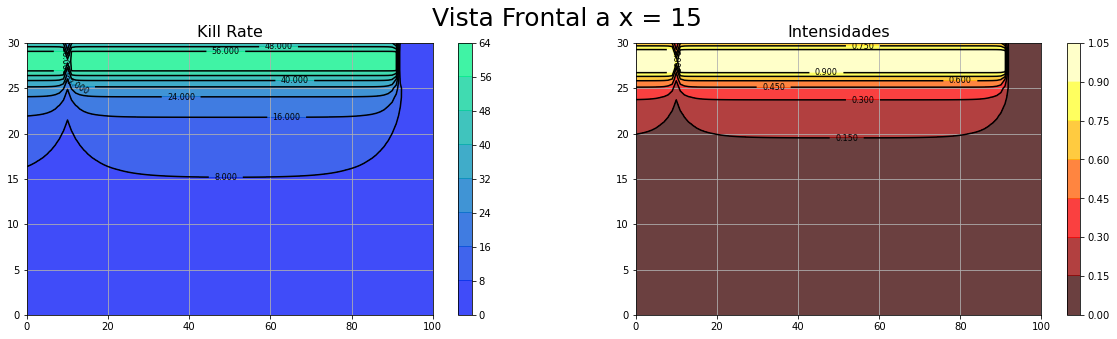

In [36]:
#Para explorar los resultados, es conveniente recuperar el vector de datos DirectField para
#cada plano de intersección
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

  
#Vista Frontal
#En la vista frontal X es un valor constante
#Z ocupa el valor de x y Y continúa siendo y
print('Plano Frontal, Corte en X: ')
planox=int(input()) # Corte en el medio

Z=[] #Los  valores recuperados en orden
Z1=[]  #DirectField
for n in range(len(coord)):
    i,j,k = coord[n]
    if (i==planox):
        Z.append(RateKill[n])
        Z1.append(DirectField1[n])  
        
X=np.arange(0,zend+1,1)
Y=np.arange(0,yend+1,1)
Z=np.reshape(Z,(yend+1,zend+1))
Z1=np.reshape(Z1,(yend+1,zend+1))

a=plt.figure(figsize=(20,5))
a.suptitle('Vista Frontal a x = '+str(planox), fontsize=25)
plt.subplot(1,2,1)
h = plt.contourf(X,Y,Z, 7, alpha=.75, cmap=plt.cm.winter)
plt.colorbar()
contours = plt.contour(X, Y, Z, 7, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Kill Rate',fontsize=16)
plt.grid()

plt.subplot(1,2,2)
h = plt.contourf(X,Y,Z1, 7, alpha=.75, cmap=plt.cm.hot)
plt.colorbar()
contours = plt.contour(X, Y, Z1, 7, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Intensidades',fontsize=16)
plt.grid()

Plano Lateral, Corte en Z: 
15


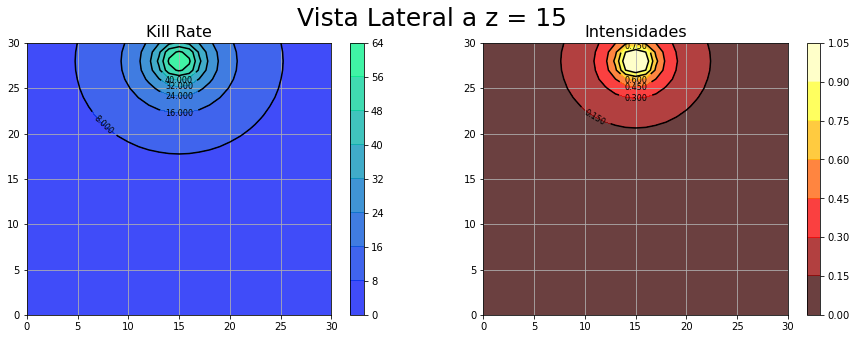

In [37]:
#Para una vista lateral Z es un plano constante
#el valor x e y siguen siendo iguales
print('Plano Lateral, Corte en Z: ')
planoz=int(input()) # Corte en el medio

Z=[]
Z1=[]

for n in range(len(coord)):
    i,j,k = coord[n]
    if (k==planoz):
        Z.append(RateKill[n])
        Z1.append(DirectField1[n])
        
X=np.arange(0,xend+1,1)
Y=np.arange(0,yend+1,1)
Z=np.reshape(Z,(xend+1,yend+1))
Z1=np.reshape(Z1,(xend+1,yend+1))

a=plt.figure(figsize=(15,5))
a.suptitle('Vista Lateral a z = '+str(planoz), fontsize=25)

plt.subplot(1,2,1)
h = plt.contourf(X,Y,Z, 7, alpha=.75, cmap=plt.cm.winter)
plt.colorbar()
contours = plt.contour(X, Y, Z,7, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Kill Rate',fontsize=16)
plt.grid()


plt.subplot(1,2,2)
h = plt.contourf(X,Y,Z1, 7, alpha=.75, cmap=plt.cm.hot)
plt.colorbar()
contours = plt.contour(X, Y, Z1, 7, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Intensidades',fontsize=16)
plt.grid()


Plano Superior, Corte en Y: 
15


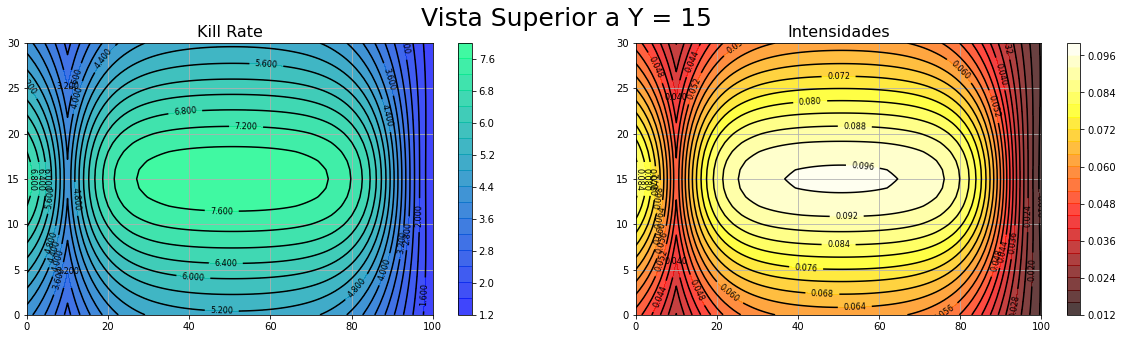

In [39]:
#Para una vista Superior, Y es un plano constante
#x es z 
#y es x

print('Plano Superior, Corte en Y: ')
planoy=int(input()) # Corte en el medio

Z=[]
Z1=[]

for n in range(len(coord)):
    i,j,k = coord[n]
    if (j==planoy):
        Z.append(RateKill[n])
        Z1.append(DirectField1[n])
        
X=np.arange(0,zend+1,1)
Y=np.arange(0,xend+1,1)
Z=np.reshape(Z,(xend+1,zend+1))
Z1=np.reshape(Z1,(xend+1,zend+1))



a=plt.figure(figsize=(20,5))
a.suptitle('Vista Superior a Y = '+str(planoy), fontsize=25)

plt.subplot(1,2,1)
h = plt.contourf(X,Y,Z, 20, alpha=.75, cmap=plt.cm.winter)
plt.colorbar()
contours = plt.contour(X, Y, Z,20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Kill Rate',fontsize=16)
plt.grid()


plt.subplot(1,2,2)
h = plt.contourf(X,Y,Z1, 20, alpha=.75, cmap=plt.cm.hot)
plt.colorbar()
contours = plt.contour(X, Y, Z1, 20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Intensidades',fontsize=16)
plt.grid()
